In [1]:
import pandas as pd


file_path = 'N:\CODING\price prei\Crop_Yield_Prediction.csv'
data = pd.read_csv(file_path)


data.head()


<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
C:\Users\NITIN PRAJWAL R\AppData\Local\Temp\ipykernel_672\1639561117.py:4: SyntaxWarning: invalid escape sequence '\C'
  file_path = 'N:\CODING\price prei\Crop_Yield_Prediction.csv'


,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,120000


<>:12: SyntaxWarning: invalid escape sequence '\C'
<>:12: SyntaxWarning: invalid escape sequence '\C'
C:\Users\NITIN PRAJWAL R\AppData\Local\Temp\ipykernel_672\1748136602.py:12: SyntaxWarning: invalid escape sequence '\C'
  file_path = 'N:\CODING\price prei\Crop_Yield_Prediction.csv'


   Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     Rainfall  Crop   Yield  
0  202.935536  Rice    7000  
1  226.655537  Rice    5000  
2  263.964248  Rice    7000  
3  242.864034  Rice    7000  
4  262.717340  Rice  120000  


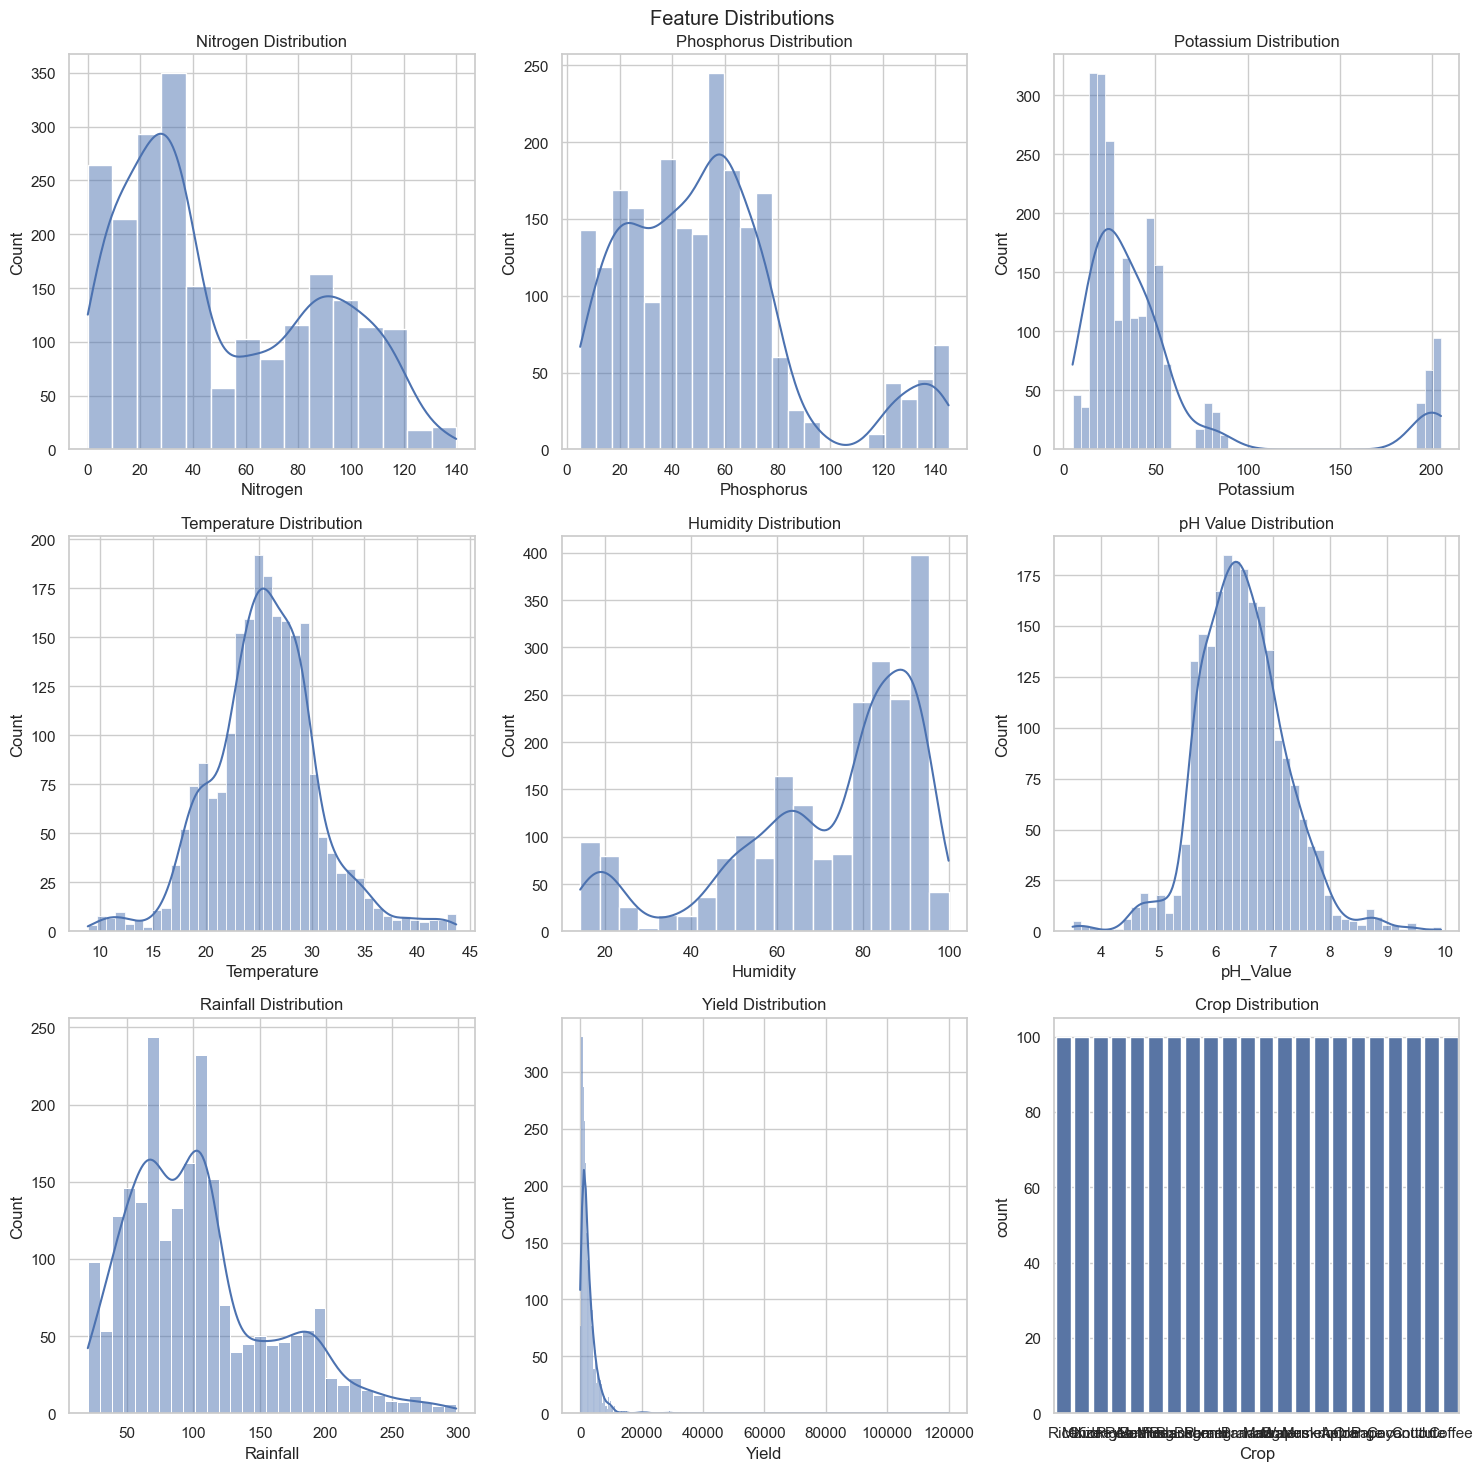

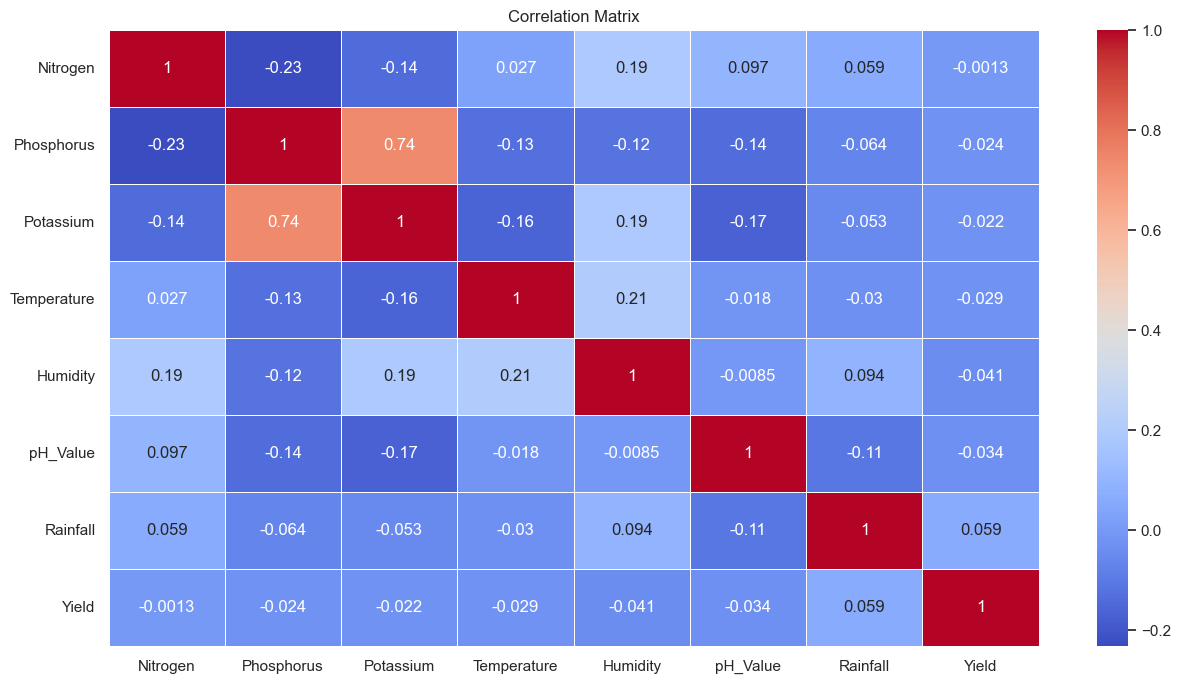

Suggested Crops and Yields for given conditions:
Empty DataFrame
Columns: [Crop, Yield]
Index: []
Mean Squared Error: 8436542.323264793
R-squared: -0.0225479580266148


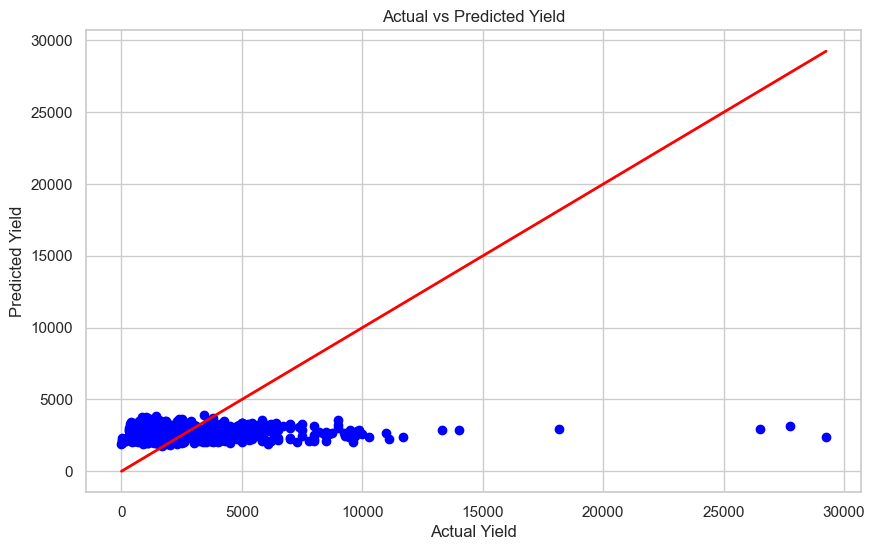

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


sns.set(style='whitegrid')


file_path = 'N:\CODING\price prei\Crop_Yield_Prediction.csv'
data = pd.read_csv(file_path)


print(data.head())


fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Feature Distributions')


sns.histplot(data['Nitrogen'], kde=True, ax=axs[0, 0]).set_title('Nitrogen Distribution')
sns.histplot(data['Phosphorus'], kde=True, ax=axs[0, 1]).set_title('Phosphorus Distribution')
sns.histplot(data['Potassium'], kde=True, ax=axs[0, 2]).set_title('Potassium Distribution')
sns.histplot(data['Temperature'], kde=True, ax=axs[1, 0]).set_title('Temperature Distribution')
sns.histplot(data['Humidity'], kde=True, ax=axs[1, 1]).set_title('Humidity Distribution')
sns.histplot(data['pH_Value'], kde=True, ax=axs[1, 2]).set_title('pH Value Distribution')
sns.histplot(data['Rainfall'], kde=True, ax=axs[2, 0]).set_title('Rainfall Distribution')
sns.histplot(data['Yield'], kde=True, ax=axs[2, 1]).set_title('Yield Distribution')
sns.countplot(x='Crop', data=data, ax=axs[2, 2]).set_title('Crop Distribution')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


plt.figure(figsize=(15, 8))
numeric_data = data.select_dtypes(include=[float, int])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


def suggest_crops(data, nitrogen, phosphorus, potassium, temperature, humidity, ph_value, rainfall):
    suitable_crops = data[
        (data['Nitrogen'] == nitrogen) &
        (data['Phosphorus'] == phosphorus) &
        (data['Potassium'] == potassium) &
        (data['Temperature'] == temperature) &
        (data['Humidity'] == humidity) &
        (data['pH_Value'] == ph_value) &
        (data['Rainfall'] == rainfall)
    ]
    return suitable_crops[['Crop', 'Yield']]


example_suggestion = suggest_crops(data, 90, 42, 43, 20.88, 82.00, 6.50, 202.94)
print("Suggested Crops and Yields for given conditions:")
print(example_suggestion)


X = data.drop(['Crop', 'Yield'], axis=1)
y = data['Yield']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield')
plt.show()
